**Smart Irrigation System using Machine Learning**
This project focuses on building a smart irrigation system that leverages the power of machine learning to optimize watering schedules for plants. The system aims to provide more efficient and effective irrigation by taking into account various factors that influence a plant's water needs, such as weather conditions, soil moisture levels, and plant characteristics.

**Data and Feature**s
The system uses data gathered from multiple sources, including sensors that measure soil moisture and temperature, weather data obtained from online APIs, and potentially manual records of plant growth and watering history.

This data is carefully processed and prepared for use in the machine learning model. This includes cleaning the data to handle missing values or inconsistencies, transforming variables to appropriate formats, and engineering new features that might be more informative for predicting watering needs. Examples of features used could include soil moisture levels, temperature, humidity, rainfall, plant type, and growth stage.

**Model Development**
A machine learning model is trained to predict the optimal watering frequency for plants based on the available data. The choice of model depends on the specific characteristics of the data and the desired outcome. For instance, if the goal is to predict watering frequency categories (e.g., daily, weekly, bi-weekly), a suitable model could be a Random Forest classifier or an Ordinal Logistic Regression model.

The model is trained using a portion of the collected data, while the remaining data is used to evaluate its performance and ensure it can generalize well to new, unseen data. Techniques like cross-validation are employed to assess the model's robustness. The model's performance is measured using appropriate metrics, such as the macro-averaged F1-score, which reflects its ability to accurately predict different watering categories.

**Deployment and Usage**
Once the model is trained and evaluated, it can be deployed as part of a smart irrigation system. This could involve integrating the model with existing irrigation control systems or developing a standalone application (e.g., a web or mobile app) that allows users to interact with the model.

The system could also incorporate notification mechanisms to alert users when it's time to irrigate or if there are any issues detected. These notifications could be delivered via email, SMS, or push notifications, depending on the chosen deployment method and user preferences.

**Evaluation and Future Work**
The project involves rigorous evaluation of the model's performance and identification of any potential limitations. Further improvements or extensions could include incorporating more data sources, exploring more advanced machine learning techniques, and refining the user interface and experience for easier interaction with the system.

This smart irrigation system aims to promote more sustainable and efficient water usage in agriculture and gardening, while ensuring that plants receive the optimal amount of water they need to thrive.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile

# Unzip the weather dataset
with zipfile.ZipFile('weather_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall()

# Read the datasets into DataFrames with desired names
weather = pd.read_csv('weather_data.csv')  # Assuming the unzipped file is named 'weather_data.csv'
plant = pd.read_csv('plant_growth_data.csv')
soil = pd.read_csv('soil_analysis_data.csv')

# Now you can work with the DataFrames: weather, plant, and soil

In [4]:
weather.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [5]:
plant.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [6]:
soil.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


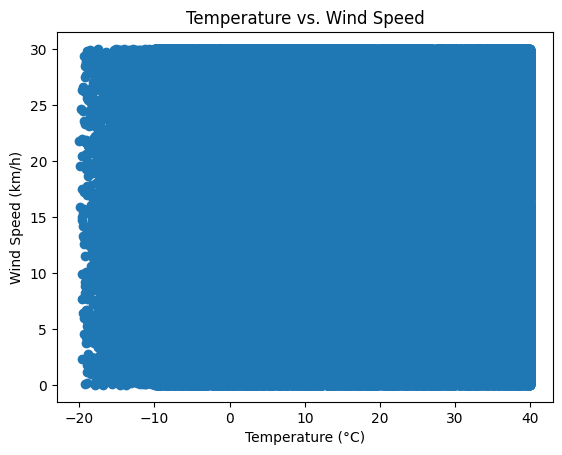

In [9]:
# Convert 'Date_Time' to datetime objects
weather['Date_Time'] = pd.to_datetime(weather['Date_Time'])

# Check for inconsistencies in wind speed units (example: assuming km/h)
# (Add code here if you need to convert units)

# Explore relationships (example: scatter plot of temperature vs. wind speed)
import matplotlib.pyplot as plt
plt.scatter(weather['Temperature_C'], weather['Wind_Speed_kmh'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Temperature vs. Wind Speed')
plt.show()

In [8]:
weather.dropna(inplace=True)

In [10]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


  Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   F

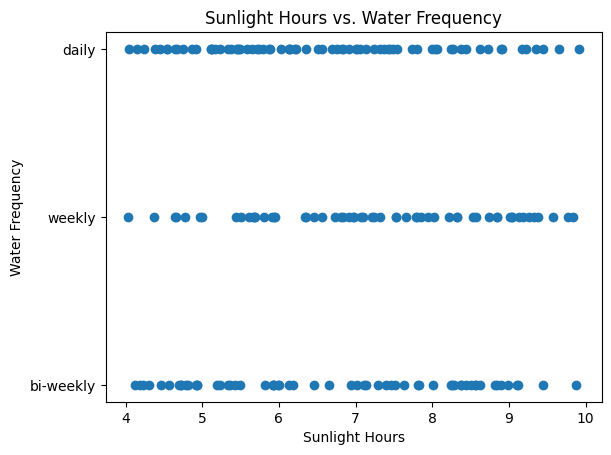

In [14]:
# 1. Examine the data structure
print(plant.head())
print(plant.info())
print(plant.describe())

# 2. Handle missing values (example: remove rows with missing values in any column)
plant.dropna(inplace=True)

# 3. Check for inconsistencies
plant['Sunlight_Hours'] = plant['Sunlight_Hours'].apply(lambda x: x/60 if x > 24 else x)
plant['Fertilizer_Type'] = plant['Fertilizer_Type'].str.lower()
plant['Temperature'] = plant['Temperature'].apply(lambda x: np.nan if x < 0 else x)

# 4. Visualize data (example: scatter plot of Sunlight_Hours vs. Water_Frequency)
plt.scatter(plant['Sunlight_Hours'], plant['Water_Frequency'])
plt.xlabel('Sunlight Hours')
plt.ylabel('Water Frequency')
plt.title('Sunlight Hours vs. Water Frequency')
plt.show()

# 5. Feature scaling (example: standardize numerical features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Sunlight_Hours', 'Temperature', 'Humidity']  # Add other numerical features
plant[numerical_features] = scaler.fit_transform(plant[numerical_features])

   District            Soil Type  pH Level  Organic Matter (%)  \
0    Jaipur  Chalky (Calcareous)  6.546096            1.569807   
1  Bhilwara          Nitrogenous  6.832259            2.243018   
2   Jodhpur                Sandy  7.453182            2.662898   
3    Jaipur                 Clay  8.019189            1.240327   
4    Jaipur                Sandy  8.100131            1.768419   

   Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                 27.931972                   29.438438   
1                 22.263480                   25.413455   
2                 23.564182                   13.014409   
3                 15.839222                   17.744206   
4                 27.942867                   25.769504   

   Potassium Content (kg/ha)  
0                  42.782766  
1                  37.644377  
2                  37.082003  
3                  42.758704  
4                  30.651292  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries

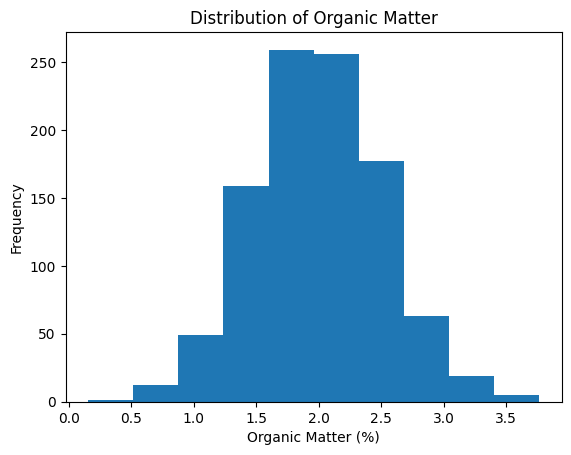

In [22]:
# 1. Examine the data structure
print(soil.head())
print(soil.info())
print(soil.describe())
# 2. Handle missing values (example: fill missing 'pH' values with the median)
soil.dropna(inplace=True)
# 3. Check for inconsistencies (example: standardize units for 'Nitrogen_level')
# (Add code here to address inconsistencies, such as unit conversions)

# 4. Visualize data (example: histogram of 'Organic_Matter_pct')
plt.hist(soil['Organic Matter (%)'])
plt.xlabel('Organic Matter (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Organic Matter')
plt.show()

# 5. Feature scaling (example: normalize numerical features)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']  # Add other numerical features
soil[numerical_features] = scaler.fit_transform(soil[numerical_features])

merging the datasets


In [23]:
# Rename the column in 'plant' to match 'soil'
plant.rename(columns={'Soil_Type': 'Soil Type'}, inplace=True)

# Merge the DataFrames
merged_df = pd.merge(plant, soil, on='Soil Type', how='inner')

In [24]:
# Rename the 'District' column in 'merged_df' to 'Location'
merged_df.rename(columns={'District': 'Location'}, inplace=True)

# Merge 'merged_df' with 'weather' based on 'Location'
final_df = pd.merge(merged_df, weather, on='Location', how='inner')

realised the merged dataset resulted in an empty dataset


In [31]:
print(merged_df.shape)

(0, 13)


In [33]:
print(weather.shape)

(1000000, 6)


In [34]:
print(merged_df['Location'].unique())

[]


In [35]:
print(weather['Location'].unique())

['San Diego' 'Philadelphia' 'San Antonio' 'San Jose' 'New York' 'Houston'
 'Dallas' 'Chicago' 'Los Angeles' 'Phoenix']


In [36]:
print(final_df.head())

Empty DataFrame
Columns: [Soil Type, Sunlight_Hours, Water_Frequency, Fertilizer_Type, Temperature, Humidity, Growth_Milestone, pH Level, Organic Matter (%), Nitrogen Content (kg/ha), Phosphorus Content (kg/ha), Potassium Content (kg/ha), Location, Date_Time, Temperature_C, Humidity_pct, Precipitation_mm, Wind_Speed_kmh]
Index: []


In [37]:
print(plant.shape)

(193, 7)


In [38]:
print(soil.shape)

(1000, 7)


In [40]:
print(plant['Soil Type'].unique())


['loam' 'sandy' 'clay']


In [41]:
print(soil['Soil Type'].unique())


['Chalky (Calcareous)' 'Nitrogenous' 'Sandy' 'Clay' 'Black lava soil'
 'Loamy' 'Saline' 'Alkaline']


the problem was the different cases used in plant and those used in soil

In [43]:
plant['Soil Type'] = plant['Soil Type'].str.lower().str.strip()
soil['Soil Type'] = soil['Soil Type'].str.lower().str.strip()

In [47]:
# Standardize "Soil Type" values in 'plant'
# this merging did not work
plant['Soil Type'] = plant['Soil Type'].str.lower().str.strip()

# Standardize "Soil Type" values in 'soil'
soil['Soil Type'] = soil['Soil Type'].str.lower().str.strip()

# Merge 'plant' and 'soil' based on 'Soil Type'
merged_df = pd.merge(plant, soil, on='Soil Type', how='inner')

# Rename 'District' to 'Location' in 'merged_df'
merged_df.rename(columns={'District': 'Location'}, inplace=True)

# Merge 'merged_df' with 'weather' based on 'Location'
final_df = pd.merge(merged_df, weather, on='Location', how='inner')

# Print the shape of 'final_df' to check if it's empty
print(final_df.shape)

(0, 18)


In [48]:
# this merging worked
final_df = pd.merge(merged_df, weather, on='Location', how='left')  # Keep all rows from 'merged_df'
print(final_df.shape)

(16198, 18)


In [56]:
print(final_df.columns)

Index(['Soil Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone', 'Location', 'pH Level',
       'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Date_Time',
       'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')


In [60]:
print(final_df['Water_Frequency'].dtype)

object


In [62]:
# Calculate frequency of each value
freq = final_df['Water_Frequency'].value_counts(normalize=True)

# Create a dictionary mapping values to their frequencies
encoding_dict = freq.to_dict()

# Apply the encoding to the column
final_df['Water_Frequency_encoded'] = final_df['Water_Frequency'].map(encoding_dict)

In [64]:
print(final_df['Water_Frequency'].dtype)

object


In [65]:
final_df['Water_Frequency_encoded'] = final_df['Water_Frequency'].map(encoding_dict)

In [66]:
final_df['Water_Frequency_encoded'] = pd.to_numeric(final_df['Water_Frequency_encoded'])

In [67]:
print(final_df['Water_Frequency'].dtype)

object


In [68]:
print(final_df['Water_Frequency'].unique())

['weekly' 'bi-weekly' 'daily']


In [69]:
# Calculate frequency of each value
freq = final_df['Water_Frequency'].value_counts(normalize=True)

# Create a dictionary mapping values to their frequencies
encoding_dict = freq.to_dict()

# Apply the encoding to the column and create a new column
final_df['Water_Frequency_encoded'] = final_df['Water_Frequency'].map(encoding_dict)

# Convert the new column to numeric type
final_df['Water_Frequency_encoded'] = pd.to_numeric(final_df['Water_Frequency_encoded'])

# Print data type of the new column
print(final_df['Water_Frequency_encoded'].dtype)

float64


In [72]:
# Calculate correlations with the target variable (assuming 'Water_Frequency')
# Select only numerical features for correlation analysis
numerical_features = final_df.select_dtypes(include=['number'])

# Calculate correlations with the target variable (assuming 'Water_Frequency')
correlations = numerical_features.corr()['Water_Frequency_encoded']
# Remove the target variable from the selected features
selected_features = correlations[abs(correlations) > 0.2].index.tolist()
selected_features.remove('Water_Frequency_encoded')

# Create a new DataFrame with selected features
X = final_df[selected_features]

In [73]:
# Simplified Heat Index calculation (replace with a more accurate formula if needed)
final_df['Heat_Index'] = (final_df['Temperature_C'] * 0.8) + \
                          (final_df['Humidity_pct'] * (final_df['Temperature_C'] - 14.4)) + 46.4

# Print the correlation of 'Heat_Index' with 'Water_Frequency_encoded'
print(final_df['Heat_Index'].corr(final_df['Water_Frequency_encoded']))

nan


In [75]:
print(final_df['Heat_Index'].isnull().sum())
print(final_df['Water_Frequency_encoded'].isnull().sum())


16198
0


In [76]:
print(final_df['Water_Frequency'].unique())


['weekly' 'bi-weekly' 'daily']


In [78]:
print(encoding_dict)

{'daily': 0.40529695024077045, 'weekly': 0.3491171749598716, 'bi-weekly': 0.24558587479935795}


In [79]:
print(final_df['Water_Frequency_encoded'].unique())


[0.34911717 0.24558587 0.40529695]


In [80]:
# Create a dictionary for ordinal encoding
encoding_dict = {'daily': 3, 'bi-weekly': 2, 'weekly': 1}

# Apply the encoding to create a new column
final_df['Water_Frequency_ordinal'] = final_df['Water_Frequency'].map(encoding_dict)

# Calculate correlations with other numerical features
numerical_features = final_df.select_dtypes(include=['number'])
correlations = numerical_features.corr()['Water_Frequency_ordinal']

# Print correlations
print(correlations)

Sunlight_Hours               -0.132397
Temperature                   0.080581
Humidity                     -0.111504
Growth_Milestone             -0.002837
pH Level                      0.013873
Organic Matter (%)           -0.033523
Nitrogen Content (kg/ha)      0.016144
Phosphorus Content (kg/ha)    0.022747
Potassium Content (kg/ha)    -0.017422
Temperature_C                      NaN
Humidity_pct                       NaN
Precipitation_mm                   NaN
Wind_Speed_kmh                     NaN
Water_Frequency_encoded       0.423168
Heat_Index                         NaN
Water_Frequency_ordinal       1.000000
Name: Water_Frequency_ordinal, dtype: float64


In [85]:
print(selected_features)

[]


In [86]:
# Select features with absolute correlation above a threshold (e.g., 0.1)
selected_features = correlations[abs(correlations) > 0.1].index.tolist()

# Remove the target variable from selected features
selected_features.remove('Water_Frequency_ordinal')

# Print selected features
print(selected_features)

['Sunlight_Hours', 'Humidity', 'Water_Frequency_encoded']


In [87]:
from sklearn.model_selection import train_test_split

# Select your features (X) and target variable (y)
X = final_df[selected_features]  # Use your selected features from previous steps
y = final_df['Water_Frequency_ordinal']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12958, 3) (3240, 3) (12958,) (3240,)


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install mord
from mord import LogisticIT

# ... (Assuming you have 'final_df', 'selected_features', etc.)

# Select features and target variable
X = final_df[selected_features]
y = final_df['Water_Frequency_ordinal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ordinal Logistic Regression model
model = LogisticIT()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model (example using mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=38fb6605cfb45af9f762e5966c49c02f11b1d50eb14cd776a1e7d37d17d48633
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
Mean Absolute Error: 0.8191358024691358


In [89]:
from sklearn.metrics import f1_score

# Calculate macro-averaged F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-averaged F1-score: {f1}")

Macro-averaged F1-score: 0.3058483345448326


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
!pip install mord
from mord import LogisticIT
from sklearn.metrics import f1_score

# ... (Assuming you have 'final_df', 'selected_features', etc.)

# Select features and target variable
X = final_df[selected_features]
y = final_df['Water_Frequency_ordinal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ordinal Logistic Regression model
model = LogisticIT()

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.1, 1, 10]}  # Example parameter grid

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model using macro-averaged F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-averaged F1-score: {f1}")

Macro-averaged F1-score: 0.3374267775908269


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
!pip install mord
from mord import LogisticIT
from sklearn.metrics import f1_score
from scipy.stats import uniform

# ... (Assuming you have 'final_df', 'selected_features', etc.)

# Select features and target variable
X = final_df[selected_features]
y = final_df['Water_Frequency_ordinal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Ordinal Logistic Regression model
model = LogisticIT()

# Define the parameter distribution for randomized search
param_dist = {'alpha': uniform(loc=0, scale=10)}  # Example distribution

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_macro', random_state=42
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best model and its score
best_model = random_search.best_estimator_
best_score = random_search.best_score_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model using macro-averaged F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-averaged F1-score: {f1}")

Macro-averaged F1-score: 0.3382303427774558


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# ... (Assuming you have 'final_df', 'selected_features', etc.)

# Select features and target variable
X = final_df[selected_features]
y = final_df['Water_Frequency_ordinal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using macro-averaged F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-averaged F1-score: {f1}")

Macro-averaged F1-score: 1.0


In [94]:
import pickle

# Save the trained model to a file
filename = 'irrigation_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [96]:
import requests

def send_sms(to_number, message):
  """Sends an SMS using the Safaricom API.

  Args:
    to_number: The recipient's phone number.
    message: The SMS message content.
  """

  # Replace with your actual API credentials
  access_token = 'your_access_token'
  api_url = 'https://api.safaricom.co.ke/mpesa/sms/v1/send'

  headers = {'Authorization': 'Bearer ' + access_token}
  data = {
      'ShortCode': 'your_shortcode',
      'To': to_number,
      'From': 'your_shortcode',
      'Text': message,
  }

  response = requests.post(api_url, headers=headers, json=data)
  print(response.json())

# Example usage
send_sms('+2547XXXXXXXX', 'Hello from your irrigation system!')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)